# DEEP LEARNING 

memisahkan data menjadi 3 bagian :

1. train data
2. test data
3. validation data

# memasukkan dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import shutil
from tqdm.notebook import tqdm as tq
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
# from efficientnet.tfkeras import EfficientNetB1

# memasukkan folder yang nantinya di jadikan ke dataset

In [2]:
mypath = 'Toyota_car/'

In [4]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name).replace("\\","/"))
        tag.append(path.split('/')[-1])
        file_name.append(name)

In [7]:
df = pd.DataFrame({'path': full_path, 'file_name': file_name, 'tag':'tag'})
df.groupby(['tag']).size()

tag
tag    496
dtype: int64

In [10]:
df

,path,file_name,tag
0,Toyota_car/Alpard/00b14b9ba43946d98735dc653dc8...,00b14b9ba43946d98735dc653dc8c78d_1200.jpg,tag
1,Toyota_car/Alpard/018353700_1663691568-IMG_202...,018353700_1663691568-IMG_20220819_101826.jpg,tag
2,Toyota_car/Alpard/054085600_1658721365-0000486...,054085600_1658721365-0000486053.jpg,tag
3,Toyota_car/Alpard/056586100_1668037395-3301959...,056586100_1668037395-330195992_1661236267772_1...,tag
4,Toyota_car/Alpard/0735da1e-d110-4f65-b04e-0622...,0735da1e-d110-4f65-b04e-06225a542d28.jpeg,tag
...,...,...,...
491,Toyota_car/Yaris/yaris-20-tahun-f174.jpg,yaris-20-tahun-f174.jpg,tag
492,Toyota_car/Yaris/yaris-exterior-right-front-th...,yaris-exterior-right-front-three-quarter.jpeg,tag
493,Toyota_car/Yaris/yaris-grs-1jpg-20211208111949...,yaris-grs-1jpg-20211208111949.jpg,tag
494,Toyota_car/Yaris/yaris_gs.jpg,yaris_gs.jpg,tag


In [11]:
df.head()

,path,file_name,tag
0,Toyota_car/Alpard/00b14b9ba43946d98735dc653dc8...,00b14b9ba43946d98735dc653dc8c78d_1200.jpg,tag
1,Toyota_car/Alpard/018353700_1663691568-IMG_202...,018353700_1663691568-IMG_20220819_101826.jpg,tag
2,Toyota_car/Alpard/054085600_1658721365-0000486...,054085600_1658721365-0000486053.jpg,tag
3,Toyota_car/Alpard/056586100_1668037395-3301959...,056586100_1668037395-330195992_1661236267772_1...,tag
4,Toyota_car/Alpard/0735da1e-d110-4f65-b04e-0622...,0735da1e-d110-4f65-b04e-06225a542d28.jpeg,tag


In [12]:
df.tail()

,path,file_name,tag
491,Toyota_car/Yaris/yaris-20-tahun-f174.jpg,yaris-20-tahun-f174.jpg,tag
492,Toyota_car/Yaris/yaris-exterior-right-front-th...,yaris-exterior-right-front-three-quarter.jpeg,tag
493,Toyota_car/Yaris/yaris-grs-1jpg-20211208111949...,yaris-grs-1jpg-20211208111949.jpg,tag
494,Toyota_car/Yaris/yaris_gs.jpg,yaris_gs.jpg,tag
495,Toyota_car/Yaris/yaris_trd.jpg,yaris_trd.jpg,tag


# train data

In [13]:
X = df['path']
y = df['tag']

In [31]:
# memisahkan split data antara train, test dan validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# kemudian:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [34]:
df_tr = pd.DataFrame({'path': X_train, 'tag': y_train, 'set':'train'})

df_te = pd.DataFrame({'path':X_test, 'tag':y_test, 'set':'test'})

df_val = pd.DataFrame({'path': X_val, 'tag': y_val, 'set': 'validation'})

In [35]:
print('train_size', len(df_tr))
print('test_size', len(df_te))
print('val size', len(df))

train_size 242
test_size 149
val size 496


In [37]:
df_all = df_tr.append([df_te, df_val]).reset_index(drop=1)

print('=====================================================\n')
print(df_all.groupby(['set', 'tag']).size(), '\n')

print('========================================================\n')

df_all.sample(3)


set         tag
test        tag    149
train       tag    242
validation  tag    105
dtype: int64 




C:\Users\Administrator\AppData\Local\Temp\ipykernel_5896\2411525728.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_tr.append([df_te, df_val]).reset_index(drop=1)


,path,tag,set
85,Toyota_car/Alpard/Untuk-TOYOTA-Alphard-Vellfir...,tag,train
219,Toyota_car/Rush/Toyota-Rush-1637562956.jpg,tag,train
279,Toyota_car/Kijang_Innova/7d817d5e-9115-4d90-b9...,tag,test


# merapikan ke folder masing masing 

In [39]:
datasource_path = "Toyota_car/"
dataset_path = "dataset/"

In [40]:
for index, row in tq(df_all.iterrows(), ):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [47]:
# Define Input Parameters
dim = (160, 160)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 10

In [45]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [50]:
train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('dataset/validation/',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('dataset/test/',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 705 images belonging to 6 classes.
Found 580 images belonging to 6 classes.
Found 619 images belonging to 6 classes.


In [51]:
print(labels)

dict_keys(['Alpard', 'Avanza', 'Kijang_Innova', 'Rush', 'Yaris', 'tag'])


In [67]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [68]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [58]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 128)     3584      
                                                                 
 activation (Activation)     (None, 160, 160, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 158, 158, 32)      36896     
                                                                 
 activation_1 (Activation)   (None, 158, 158, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 79, 79, 32)        0         
                                                      

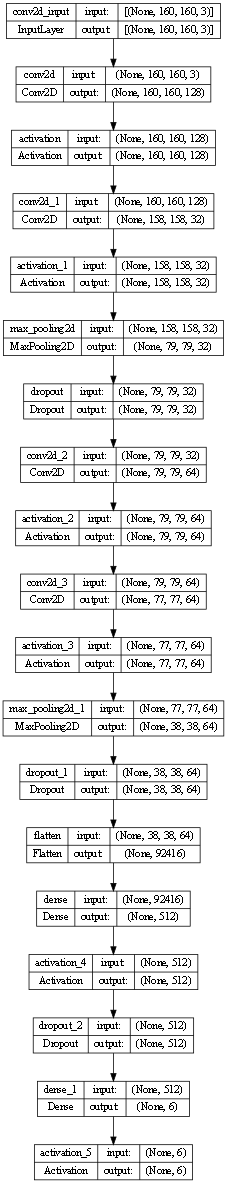

In [60]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [61]:
EPOCH = 2

In [69]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/2
 7/45 [===>..........................] - ETA: 10:37 - loss: 3.1138 - accuracy: 0.1339

C:\Users\Administrator\anaconda3\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


45/45 [==============================] - 808s 18s/step - loss: 1.9598 - accuracy: 0.2965 - val_loss: 1.7983 - val_accuracy: 0.1741
Epoch 2/2
45/45 [==============================] - 824s 18s/step - loss: 1.7386 - accuracy: 0.3206 - val_loss: 1.8116 - val_accuracy: 0.1759


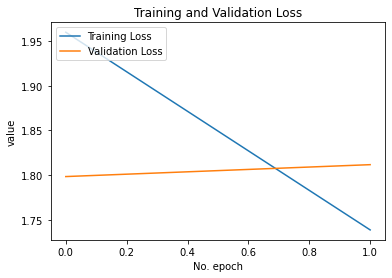

In [70]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

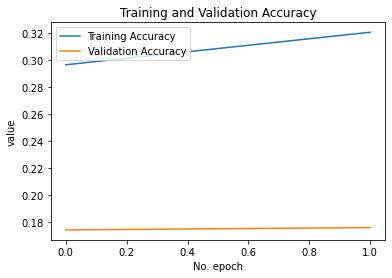

In [71]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [72]:
loss, acc = model.evaluate(train_data, steps=len(train_generator), verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data, steps=len(test_generator), verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')    

Accuracy on training data: 0.3248 
Loss on training data: 1.7265 

Accuracy on test data: 0.2262 
Loss on test data: 1.7839 

